# Osteoporosis Risk Prediction

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d amitvkulkarni/lifestyle-factors-influencing-osteoporosis

Dataset URL: https://www.kaggle.com/datasets/amitvkulkarni/lifestyle-factors-influencing-osteoporosis
License(s): apache-2.0
  0%|                                               | 0.00/25.2k [00:00<?, ?B/s]
100%|███████████████████████████████████████| 25.2k/25.2k [00:00<00:00, 915kB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Osteoporosis Risk Prediction/lifestyle-factors-influencing-osteoporosis.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Osteoporosis Risk Prediction')

## Exploratory Data Analysis

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [36]:
df = pd.read_csv('osteoporosis.csv')

In [5]:
df.head()

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
0,1734616,69,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,Yes,Moderate,Rheumatoid Arthritis,Corticosteroids,Yes,1
1,1419098,32,Female,Normal,Yes,Asian,Underweight,Low,Sufficient,Sedentary,No,NaN,NaN,NaN,Yes,1
2,1797916,89,Female,Postmenopausal,No,Caucasian,Normal,Adequate,Sufficient,Active,No,Moderate,Hyperthyroidism,Corticosteroids,No,1
3,1805337,78,Female,Normal,No,Caucasian,Underweight,Adequate,Insufficient,Sedentary,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,No,1
4,1351334,38,Male,Postmenopausal,Yes,African American,Normal,Low,Sufficient,Active,Yes,NaN,Rheumatoid Arthritis,NaN,Yes,1


In [7]:
df.shape

(1958, 16)

In [8]:
df.size

31328

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1958.0,1.549929e+06,261424.953731,1100064.0,1319163.0,1546027.5,1775870.5,1999676.0
Age,1958.0,3.910112e+01,21.355424,18.0,21.0,32.0,53.0,90.0
Osteoporosis,1958.0,5.000000e-01,0.500128,0.0,0.0,0.5,1.0,1.0


In [11]:
df.isnull().sum()

Id                       0
Age                      0
Gender                   0
Hormonal Changes         0
Family History           0
Race/Ethnicity           0
Body Weight              0
Calcium Intake           0
Vitamin D Intake         0
Physical Activity        0
Smoking                  0
Alcohol Consumption    988
Medical Conditions     647
Medications            985
Prior Fractures          0
Osteoporosis             0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.nunique()

Id                     1958
Age                      73
Gender                    2
Hormonal Changes          2
Family History            2
Race/Ethnicity            3
Body Weight               2
Calcium Intake            2
Vitamin D Intake          2
Physical Activity         2
Smoking                   2
Alcohol Consumption       1
Medical Conditions        2
Medications               1
Prior Fractures           2
Osteoporosis              2
dtype: int64

In [14]:
df['Osteoporosis'].value_counts()

Osteoporosis
1    979
0    979
Name: count, dtype: int64

In [19]:
df['Osteoporosis'].unique()

array([1, 0])

In [20]:
df['Alcohol Consumption'].unique()

array(['Moderate', nan], dtype=object)

In [21]:
df['Medications'].unique()

array(['Corticosteroids', nan], dtype=object)

In [18]:
df['Medical Conditions'].unique()

array(['Rheumatoid Arthritis', nan, 'Hyperthyroidism'], dtype=object)

## Data Visualization

<Figure size 800x500 with 0 Axes>

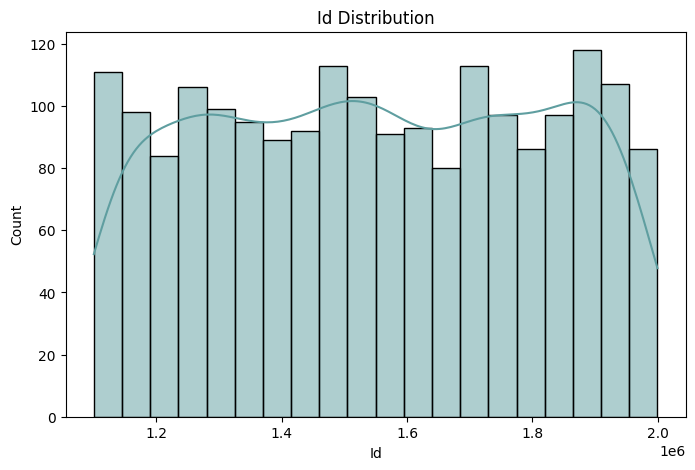

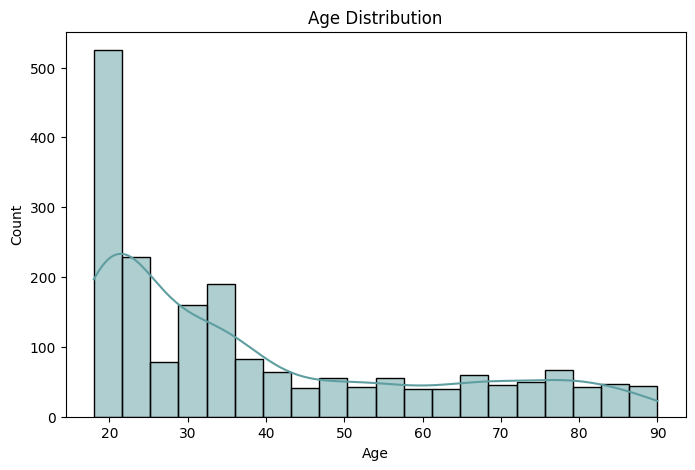

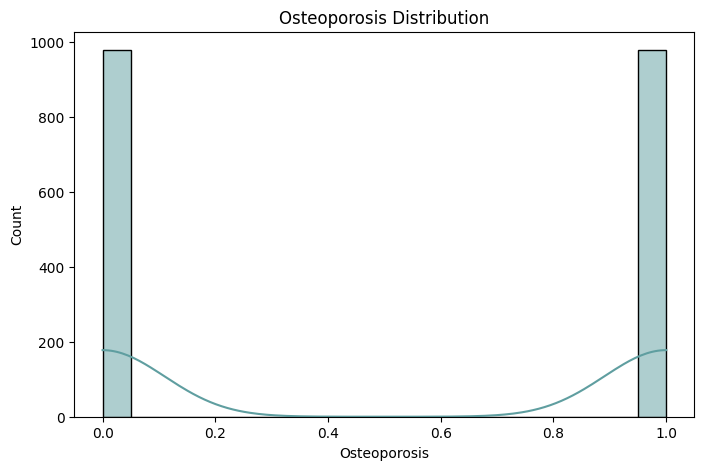

In [ ]:
# Histplot for all numerical values


plt.figure(figsize=(8,5))
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], bins=20, kde=True, color='cadetblue')
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

<Figure size 800x500 with 0 Axes>

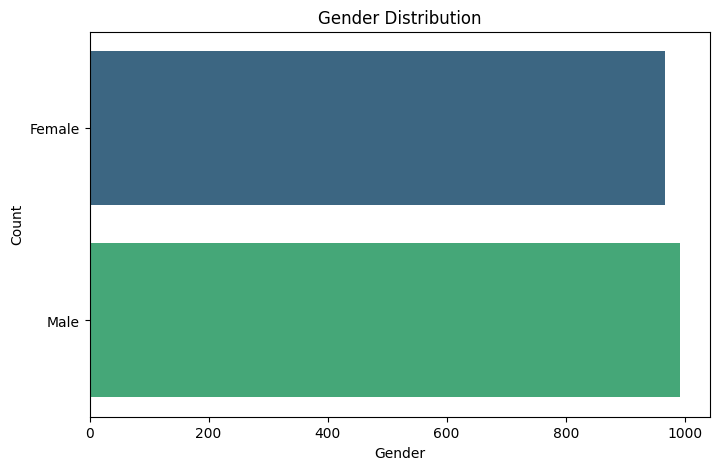

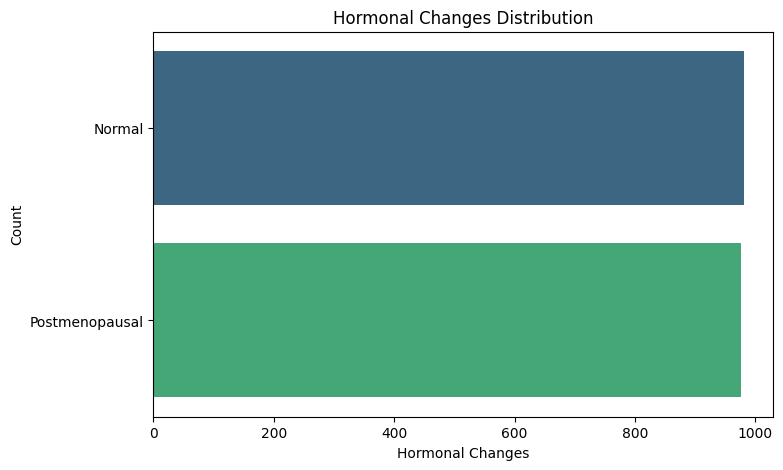

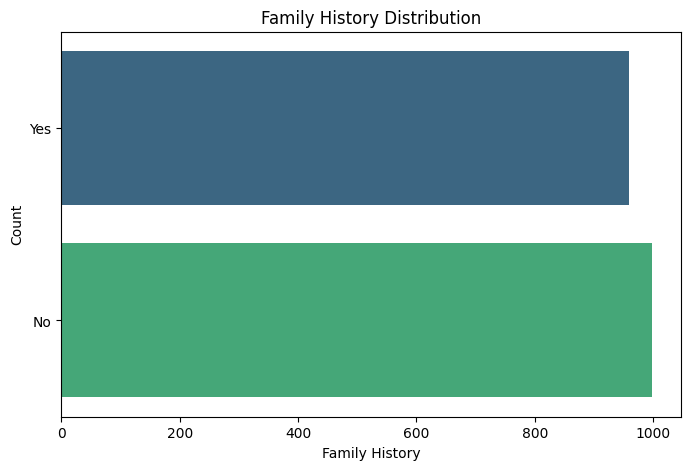

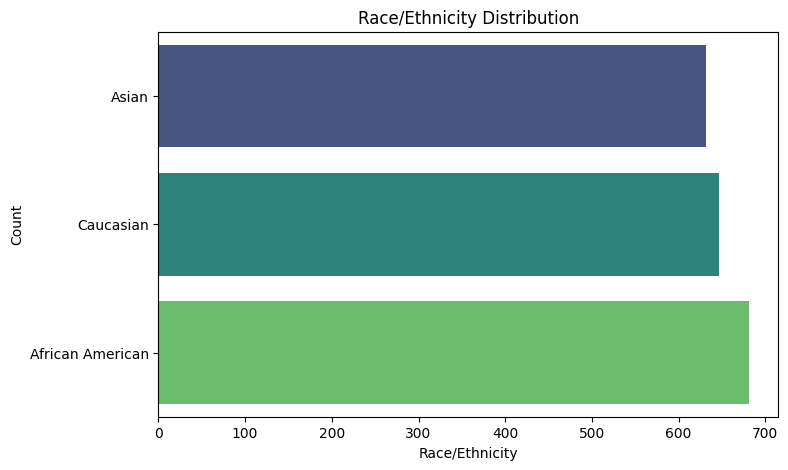

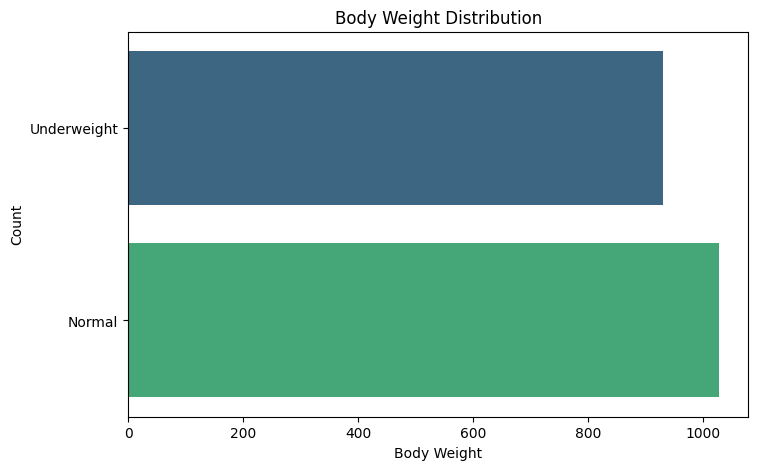

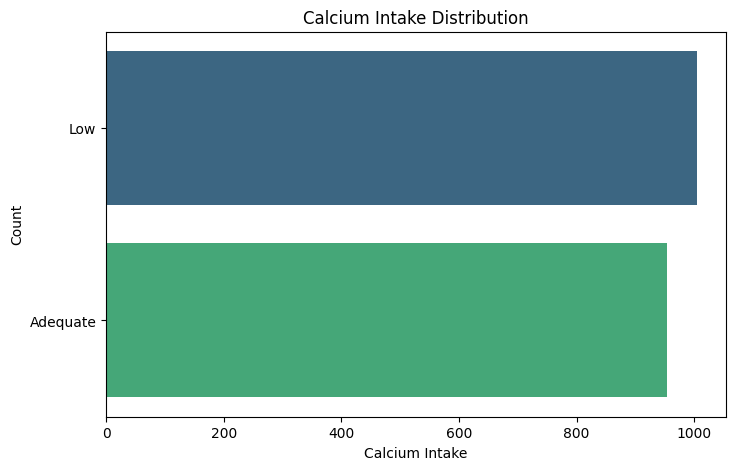

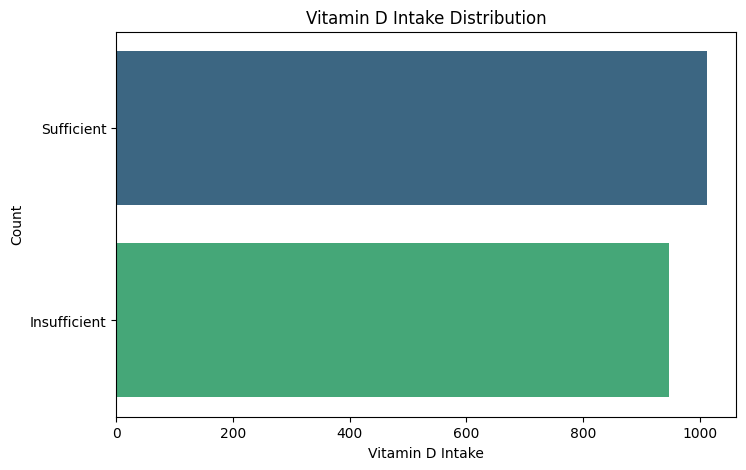

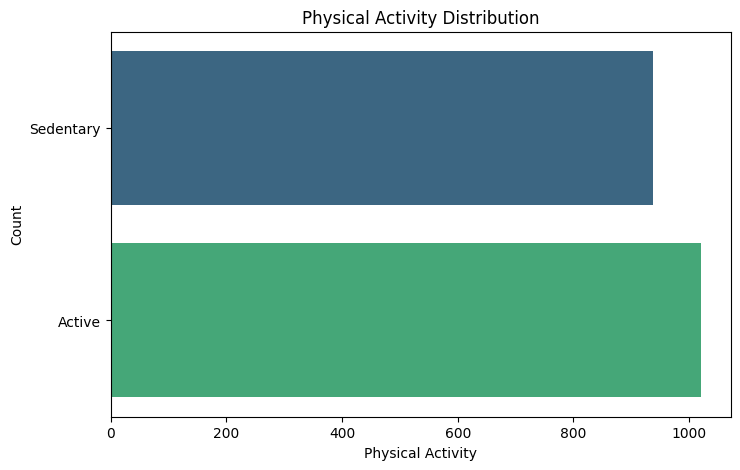

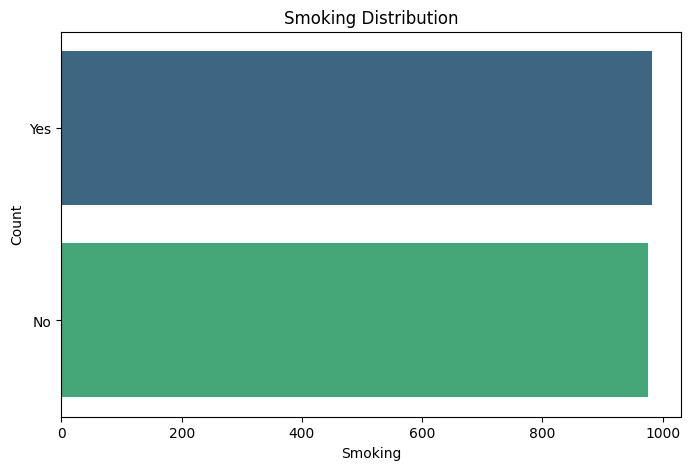

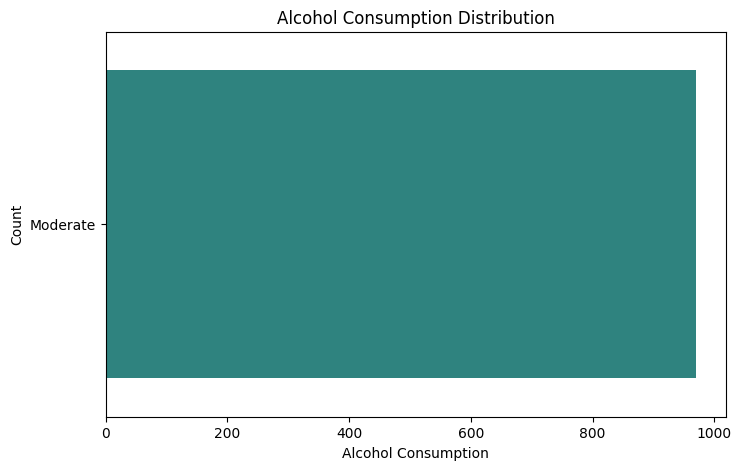

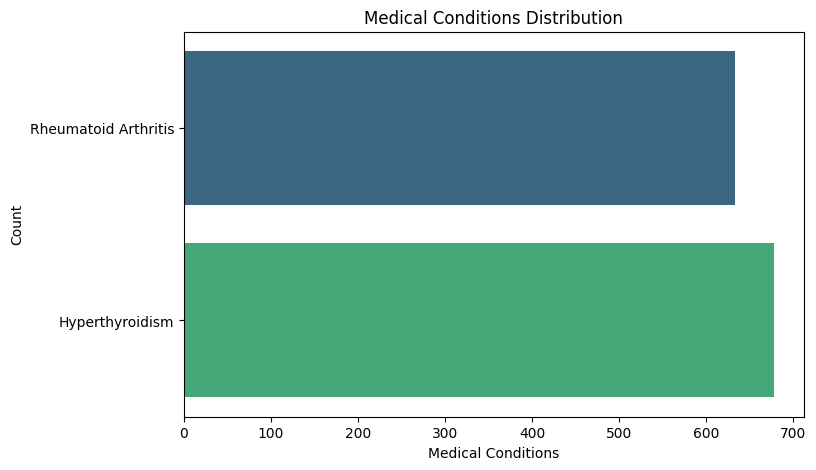

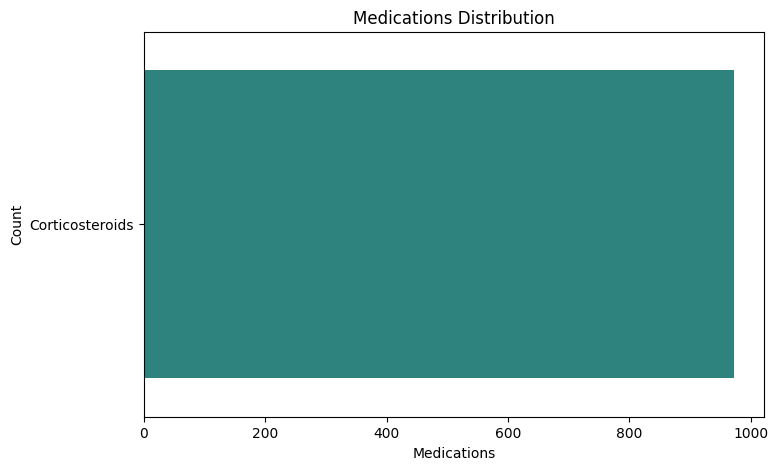

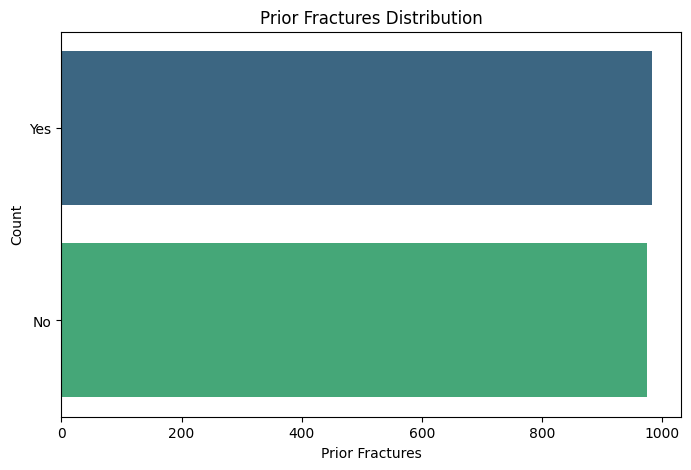

In [54]:
# Bar plot for all categorical values

plt.figure(figsize=(8,5))
for column in df.select_dtypes(include=[object]).columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(df[column], palette='viridis')
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

<Figure size 600x600 with 0 Axes>

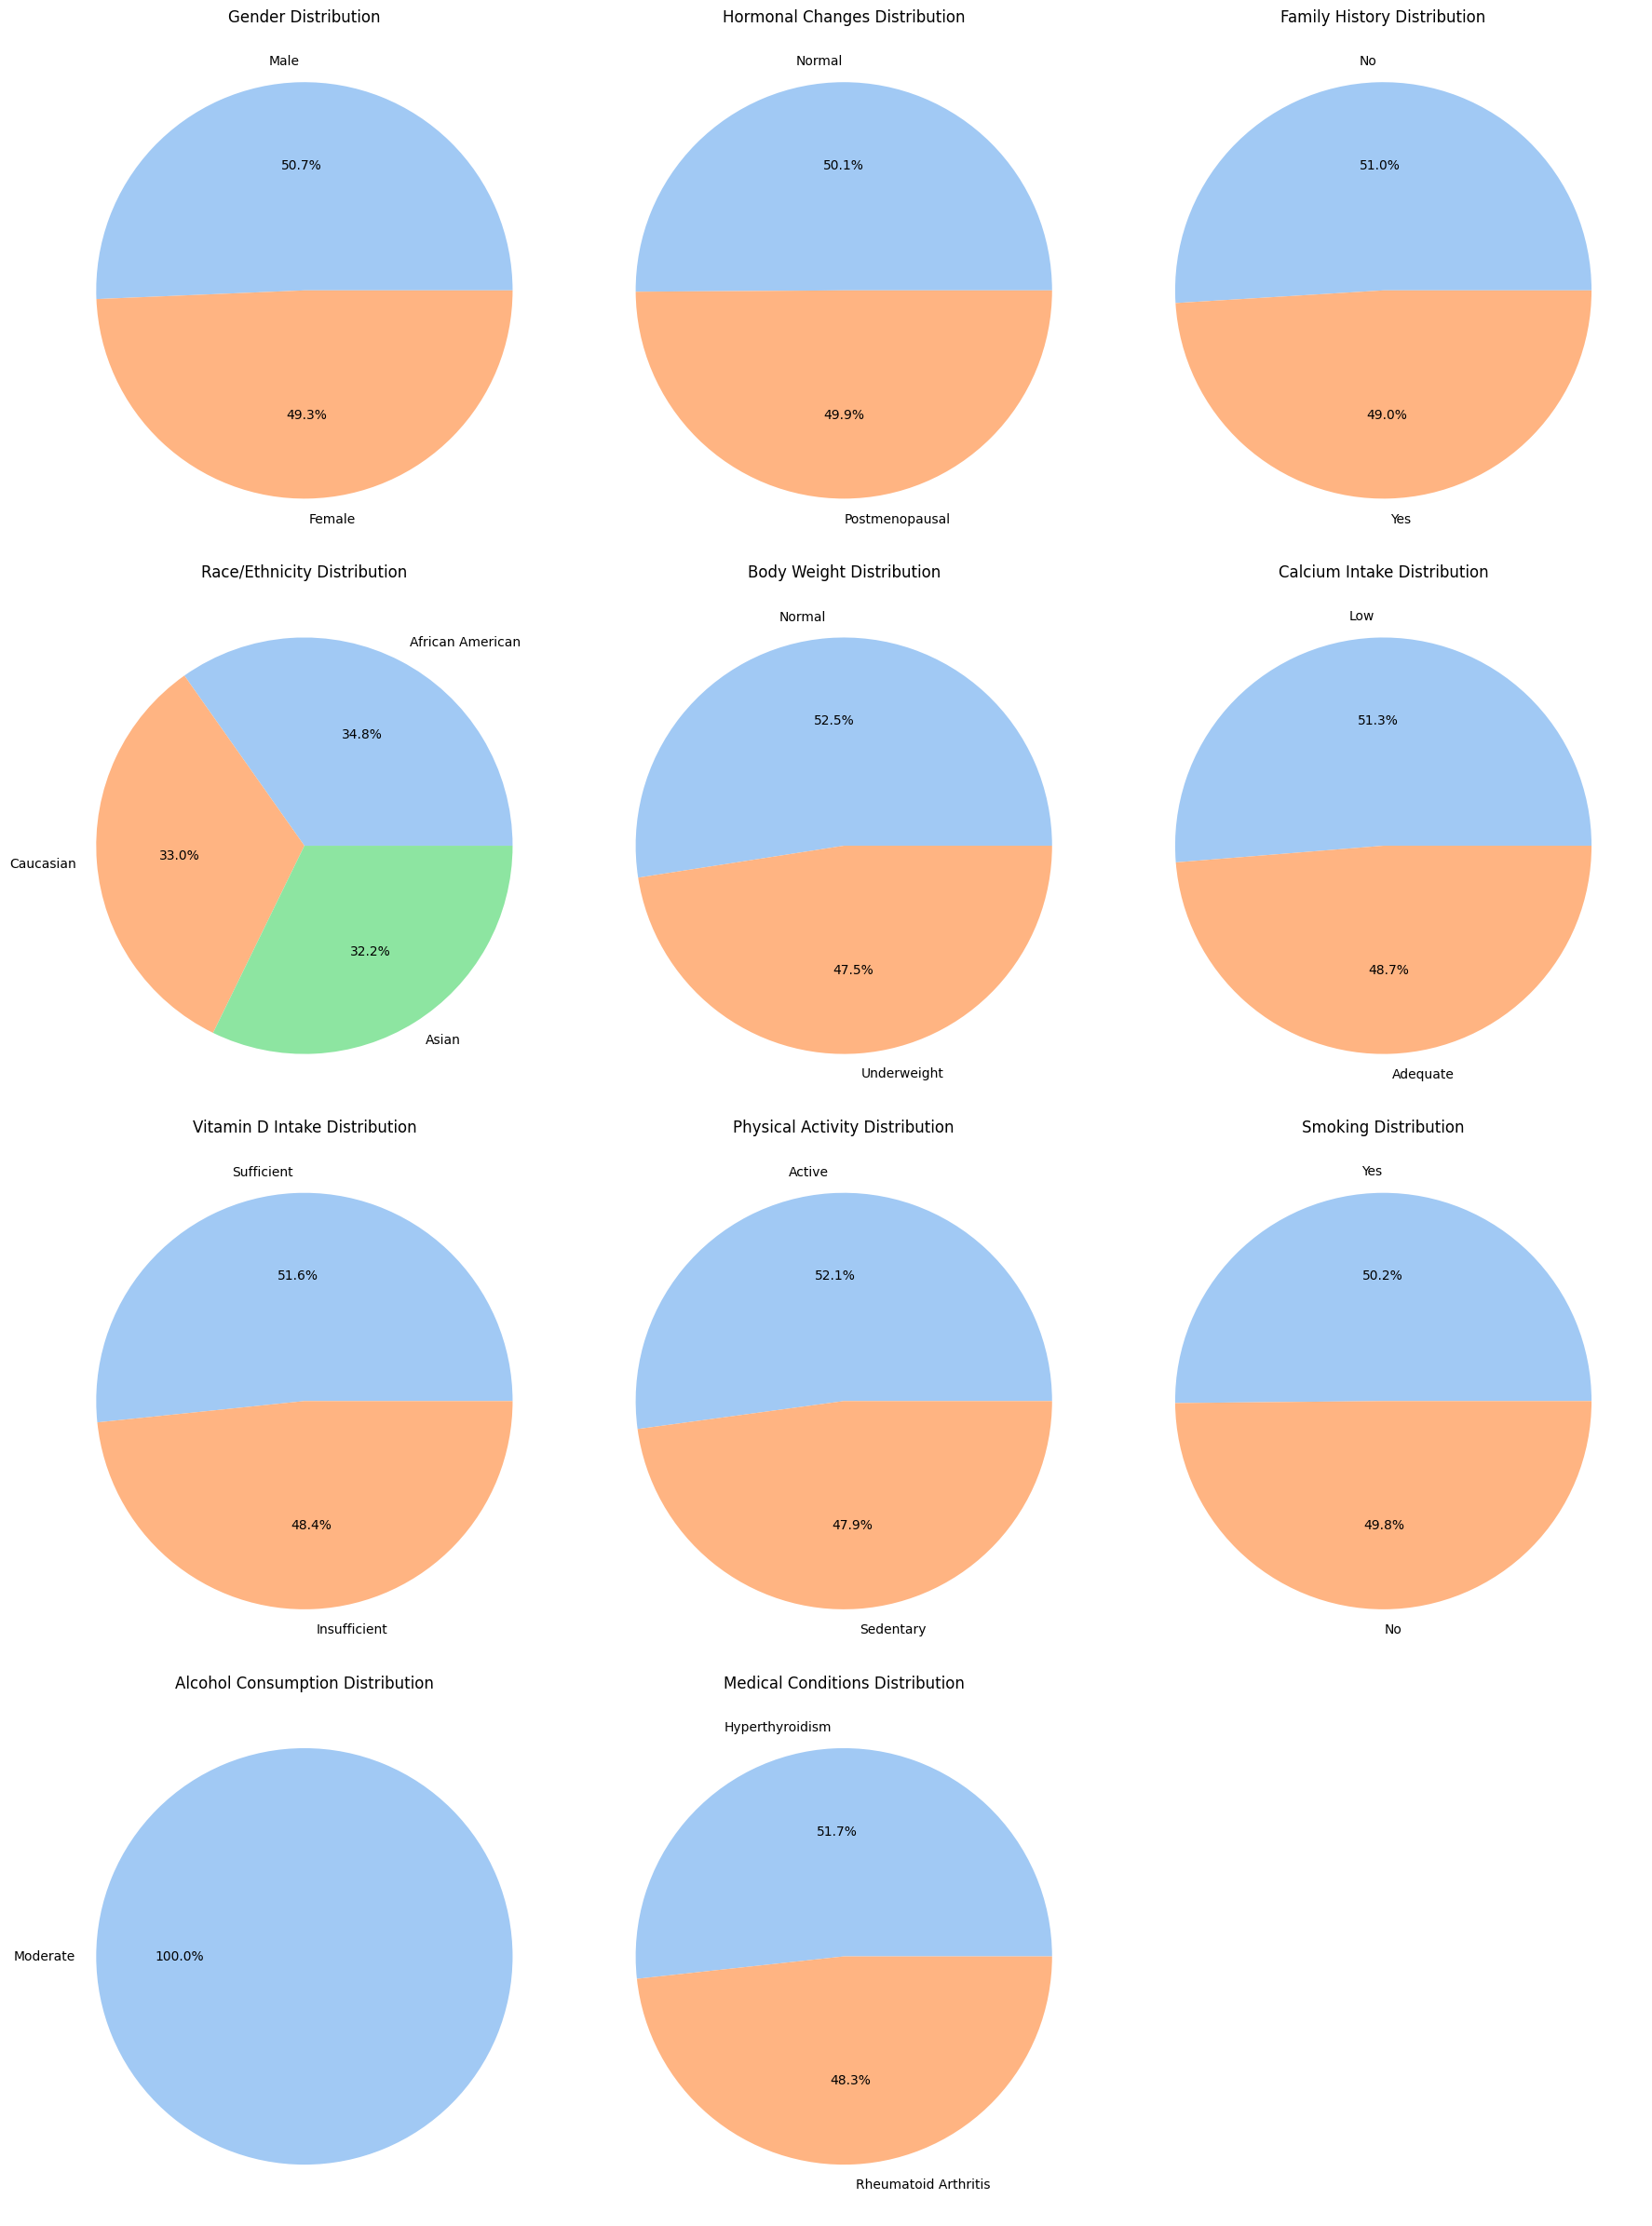

In [ ]:
# Pie chart for all columns

plt.figure(figsize=(6,6))

categorical_columns = ['Gender','Hormonal Changes', 'Family History', 'Race/Ethnicity', 'Body Weight', 
                       'Calcium Intake', 'Vitamin D Intake', 'Physical Activity', 'Smoking', 
                       'Alcohol Consumption', 'Medical Conditions']

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 24))
fig.delaxes(axes.flatten()[-1])  
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    df[col].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[i], colors=sns.color_palette('pastel'))
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()


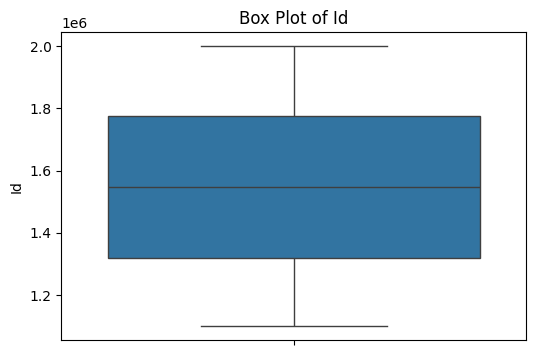

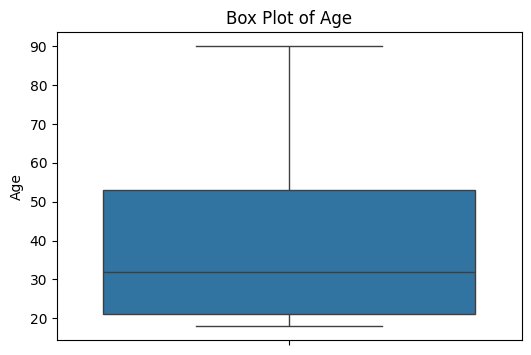

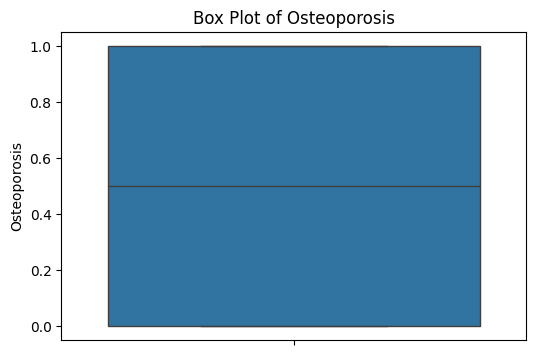

In [ ]:
# Box plot for Numerical Column

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f"Box Plot of {col}")
    plt.show()

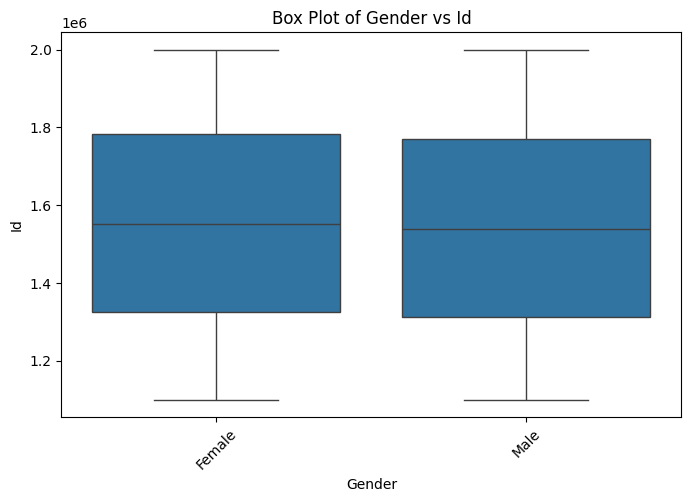

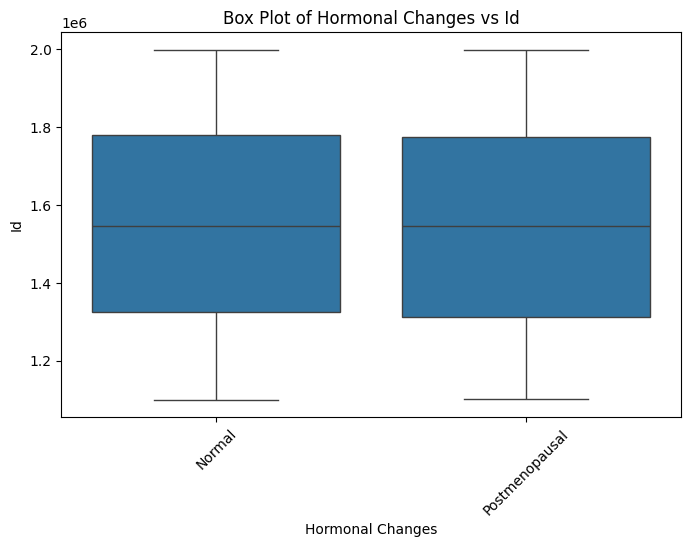

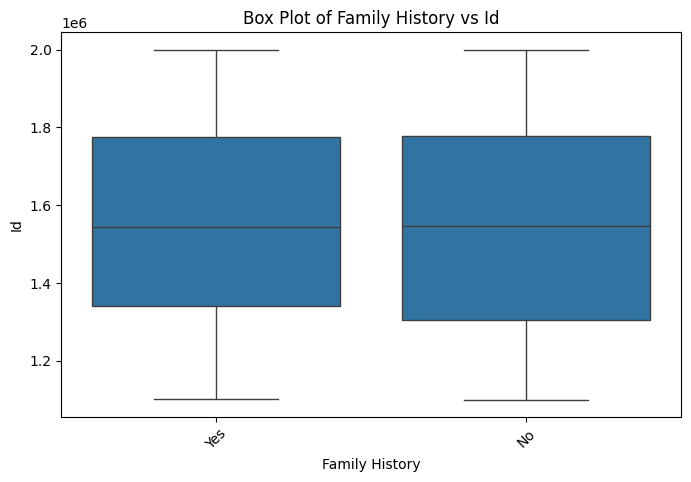

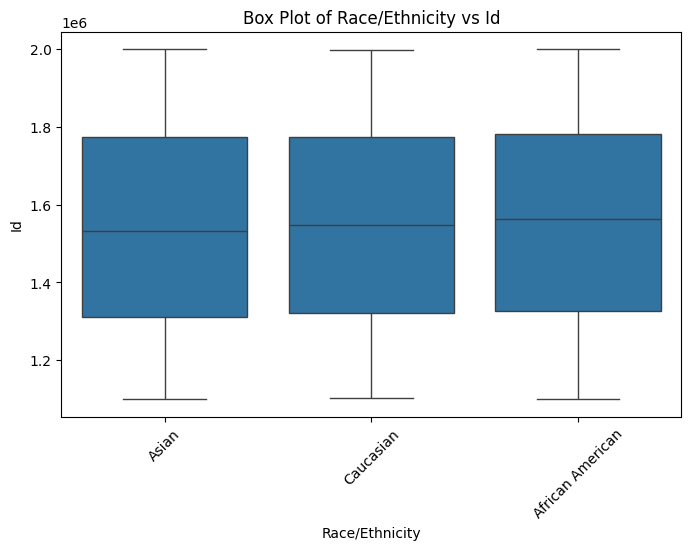

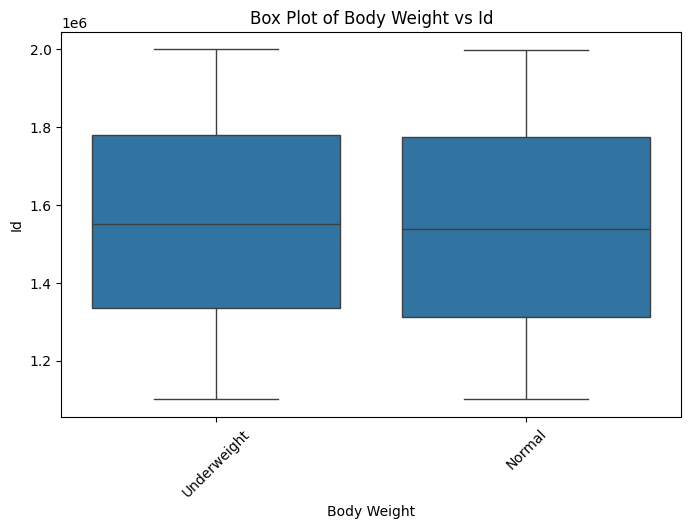

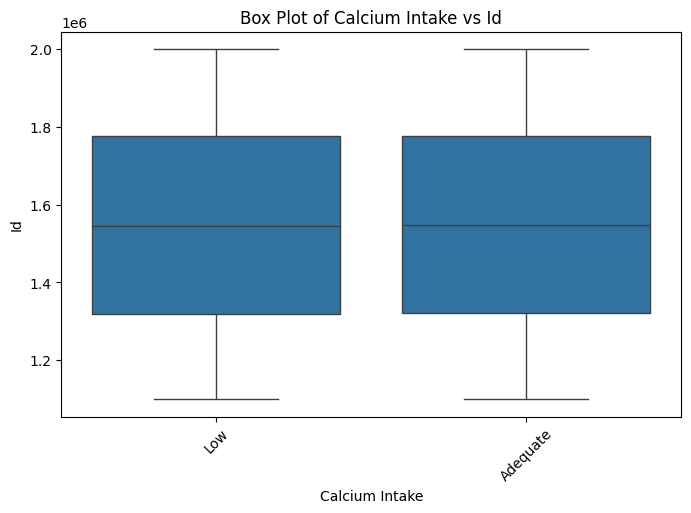

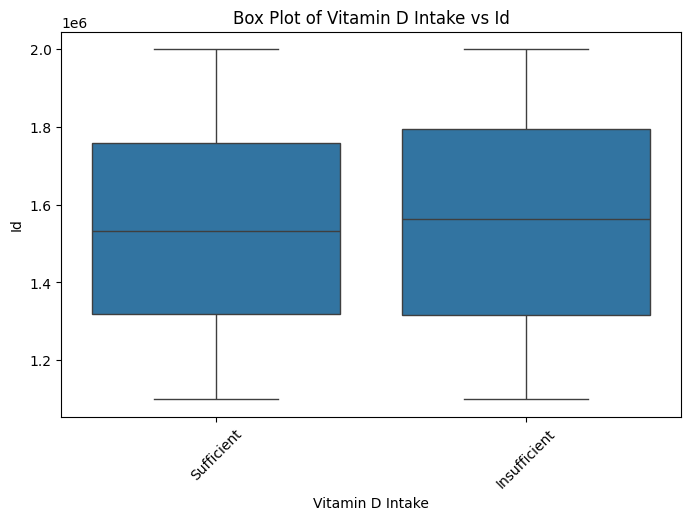

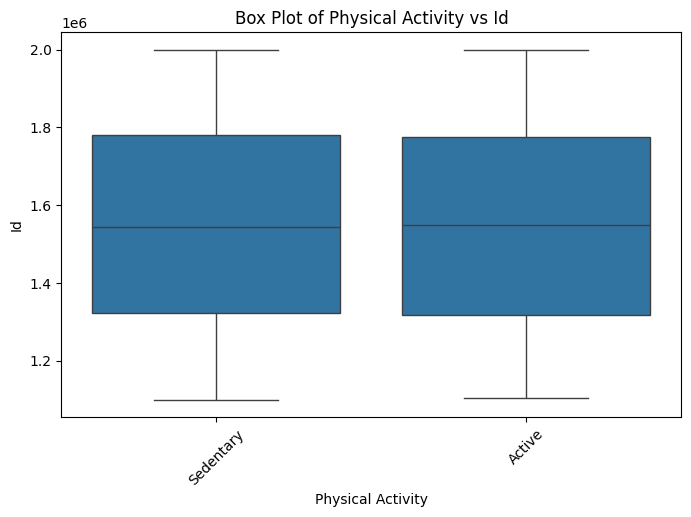

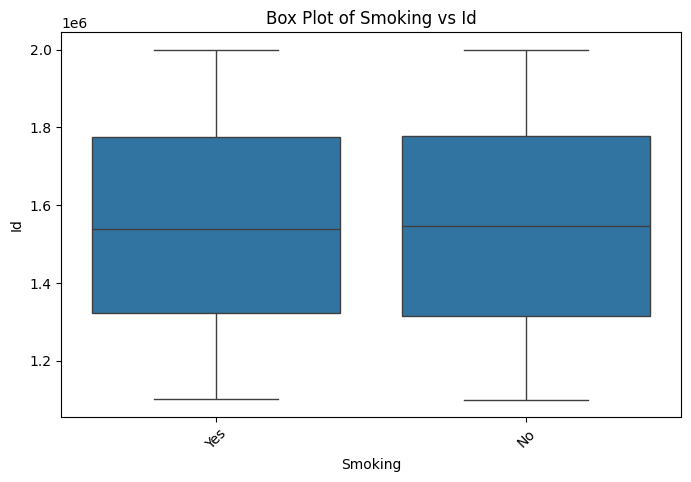

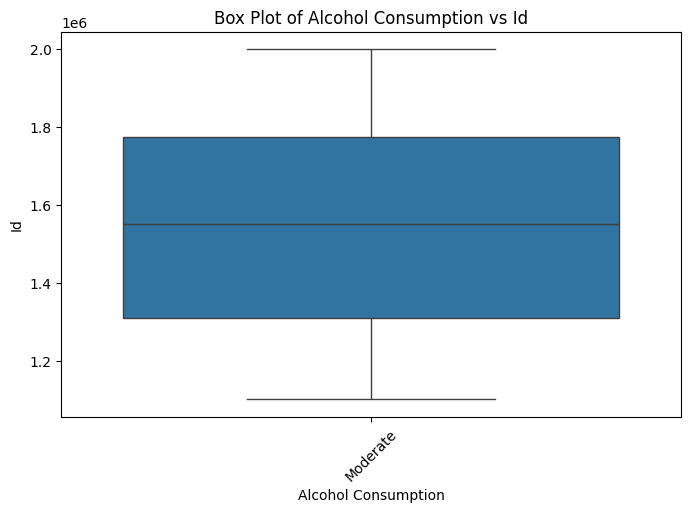

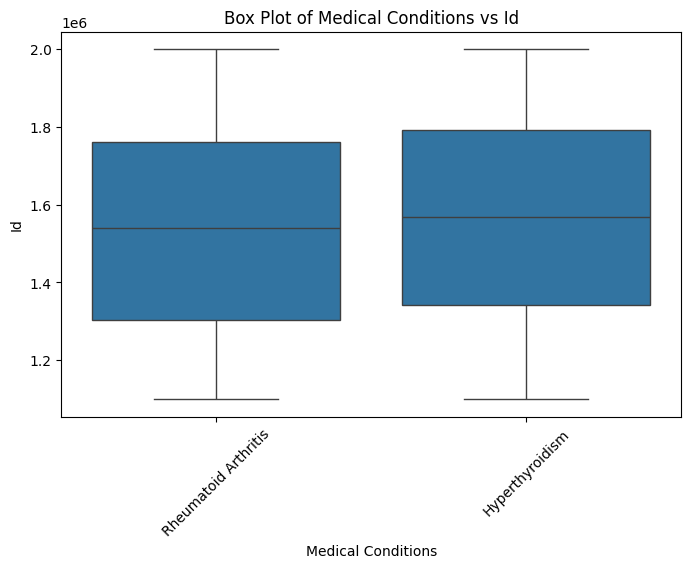

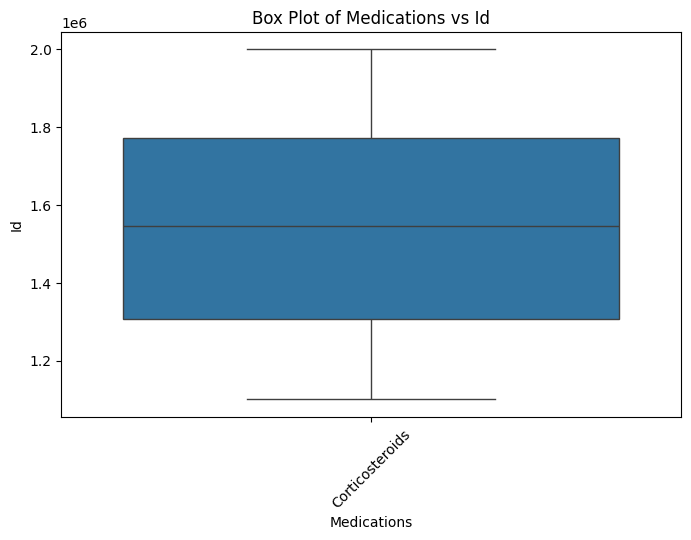

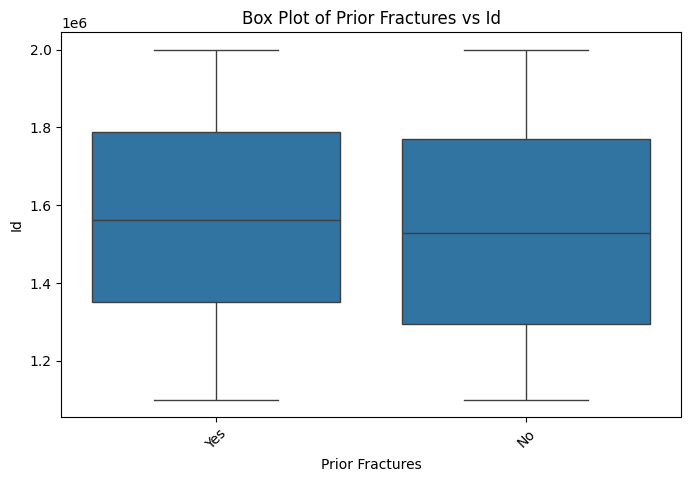

In [59]:
# Box plot for Categorical Column

categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col], y=df[numerical_columns[0]])  # Using the first numerical column
    plt.xticks(rotation=45)
    plt.title(f"Box Plot of {col} vs {numerical_columns[0]}")
    plt.show()

## Data Preprocessing

In [17]:
# Dropping 'Id' column as it is not required

df.drop('Id', axis=1, inplace=True)

In [22]:
# Imputing missing values 

df['Alcohol Consumption'] = df['Alcohol Consumption'].replace('Yes', 'Moderate').fillna('No')
df['Medications'] = df['Medications'].replace('Yes', 'Corticosteroids').fillna('No')
df['Medical Conditions'] = df['Medical Conditions'].map({'Rheumatoid Arthritis': 1, 'Hyperthyroidism': 2}).fillna(0)

In [23]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns[1:-1]:
    df[col] = encoder.fit_transform(df[col].values)

In [25]:
## Applying standard scaler to age column

from sklearn.preprocessing import StandardScaler

df['Age'] = StandardScaler().fit_transform(df['Age'].values.reshape(-1,1))

In [26]:
X = df.drop('Osteoporosis', axis=1)
y = df['Osteoporosis']

In [27]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training

In [33]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [29]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [30]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.8035714285714286, 0.8443877551020408, 0.8673469387755102, 0.8520408163265306, 0.8520408163265306, 0.9081632653061225, 0.8903061224489796, 0.8392857142857143, 0.8239795918367347]


## Model Evaluation

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.81       193
           1       0.82      0.78      0.80       199

    accuracy                           0.80       392
   macro avg       0.80      0.80      0.80       392
weighted avg       0.80      0.80      0.80       392

Confusion Matrix:
 [[160  33]
 [ 44 155]]


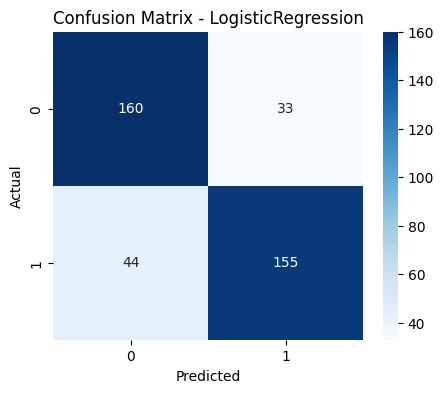

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.99      0.86       193
           1       0.99      0.70      0.82       199

    accuracy                           0.84       392
   macro avg       0.88      0.85      0.84       392
weighted avg       0.88      0.84      0.84       392

Confusion Matrix:
 [[192   1]
 [ 60 139]]


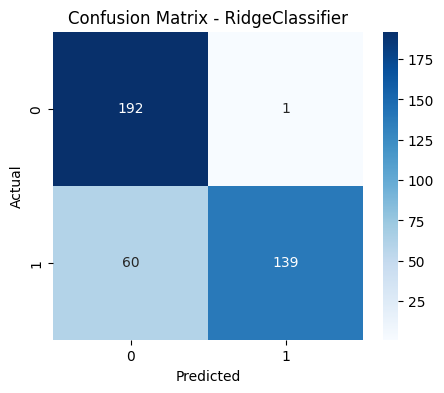

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87       193
           1       0.90      0.83      0.86       199

    accuracy                           0.87       392
   macro avg       0.87      0.87      0.87       392
weighted avg       0.87      0.87      0.87       392

Confusion Matrix:
 [[175  18]
 [ 34 165]]


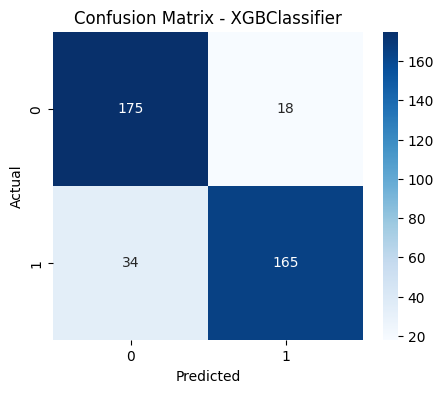

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.95      0.86       193
           1       0.94      0.75      0.83       199

    accuracy                           0.85       392
   macro avg       0.86      0.85      0.85       392
weighted avg       0.87      0.85      0.85       392

Confusion Matrix:
 [[184   9]
 [ 50 149]]


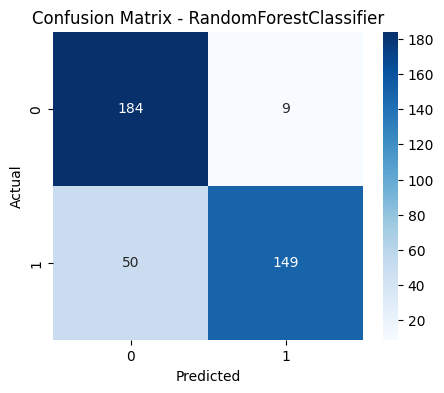

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87       193
           1       1.00      0.71      0.83       199

    accuracy                           0.85       392
   macro avg       0.88      0.85      0.85       392
weighted avg       0.89      0.85      0.85       392

Confusion Matrix:
 [[193   0]
 [ 58 141]]


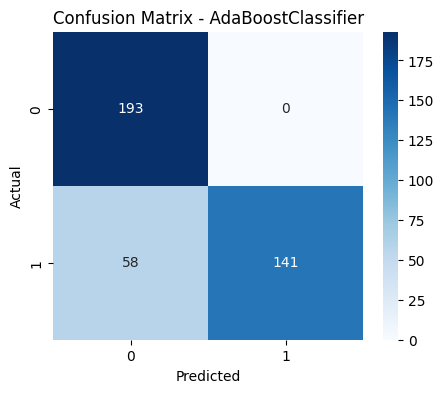

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.91       193
           1       0.99      0.82      0.90       199

    accuracy                           0.91       392
   macro avg       0.92      0.91      0.91       392
weighted avg       0.92      0.91      0.91       392

Confusion Matrix:
 [[192   1]
 [ 35 164]]


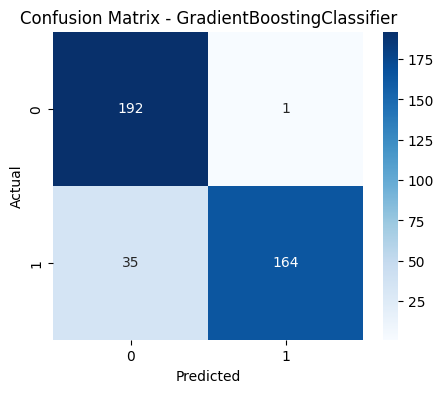

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89       193
           1       0.94      0.82      0.88       199

    accuracy                           0.88       392
   macro avg       0.89      0.88      0.88       392
weighted avg       0.89      0.88      0.88       392

Confusion Matrix:
 [[182  11]
 [ 35 164]]


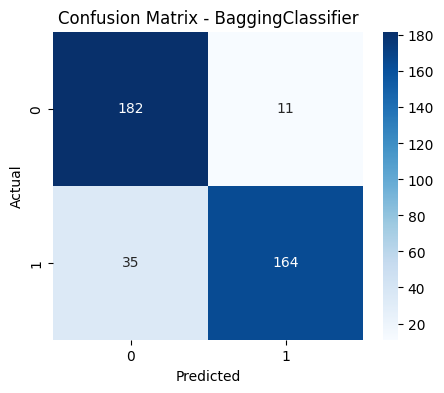

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       193
           1       0.84      0.84      0.84       199

    accuracy                           0.84       392
   macro avg       0.84      0.84      0.84       392
weighted avg       0.84      0.84      0.84       392

Confusion Matrix:
 [[162  31]
 [ 32 167]]


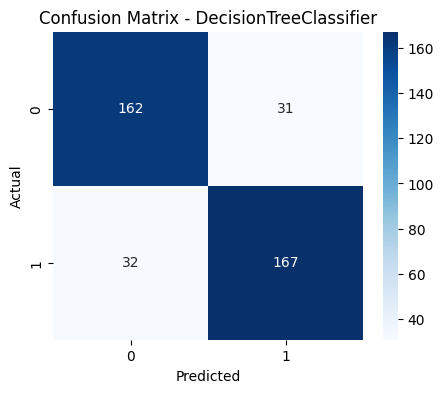

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.91      0.84       193
           1       0.90      0.74      0.81       199

    accuracy                           0.82       392
   macro avg       0.83      0.83      0.82       392
weighted avg       0.84      0.82      0.82       392

Confusion Matrix:
 [[176  17]
 [ 52 147]]


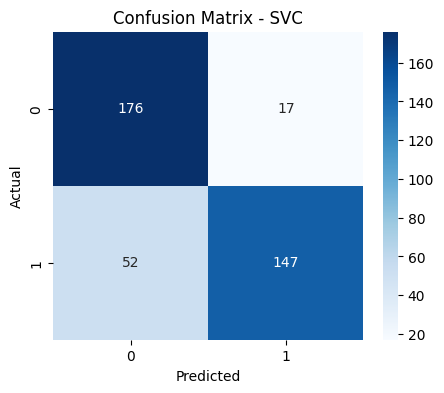

In [34]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()